## 사이킷런 소개와 특징

In [1]:
pip install -U scikit-learn

In [2]:
import sklearn
print(sklearn.__version__)

1.1.1


## 붓꽃 품종 예측하기

#### 필요한 모듈 import

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#### iris data 불러오기

In [4]:
import pandas as pd
import numpy as np

iris = load_iris()

iris_data = iris.data

iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


#### 학습용 데이터와 테스트 데이터 분리

In [5]:
#테스트 데이터 20% 학습데이터 80%로 분할
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

#random_state : 호출할 때마다 다른 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 발생 값
#train_test_split은 호출 시 무작위로 데이터를 분리하므로 random_State를 지정하지 않으면 수행할 때마다 다른 데이터를 만들 수 있다.
#실습이나 학습, 대회 시 유용하다고 한다.

#### DecisionTreeClassifier 객체 생성

In [6]:
dt_clf = DecisionTreeClassifier(random_state=11)

#### 학습 데이터로 학습 수행

In [7]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=11)

#### 테스트 데이터로 예측 수행

In [58]:
pred = dt_clf.predict(X_test)

C:\Users\ohmyh\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


#### 모델 평가

In [9]:
from sklearn.metrics import accuracy_score
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도 : 0.9333


## 사이킷런의 기반 프레임워크 익히기

### Estimator

* Classifier와 Regressor 클래스를 합쳐서 Estimator 클래스라고 부른다.
* 지도학습의 모든 알고리즘을 구현한 클래스이다.
* fit(), predict()를 내부에서 구현한다.
* evaluation, 하이퍼파라미터 튜닝을 지원하는 클래스의 경우 이 Estimator를 인자로 받는다.

### 비지도학습 클래스

* 대부분 fit(), transform()을 적용한다.
* 비지도학습에서 fit()은 지도학습의 fit()과 달리 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전   구조를 맞추는 작업임
* tranform()을 이용해 차원 변환, 클러스터링, 피처 추출 등의 실제 작업을 수행
* 둘을 결합한 fit_transform()도 제공 but, 주의 필요

### 사이킷런의 주요 모듈

* 예체 데이터, 피처 처리, 차원 축소 등의 주요 모듈을 제공한다.

### 내장된 예제 데이터 세트

* 내장 데이터 세트 : datasets 모듈에 있는 여러 API를 호출해 만들 수 있다.
* fetch계열 : 인터넷에서 서브 디렉터리로 저장한 후 불러들여 사용한다.
* 분류와 클러스터링을 위한 표본 데이터 생성기 제공
* 예제 데이터 세트는 일반적으로 딕셔너리 형태로 돼 있다.
* 키는 : data, target, target_name, feature_names, DESCR로 구성돼 있다.
* data와 target은 numpy 배열 타입, target_names와 feature_names는 numpy배열 또는 파이썬list 타입, DESCR   은 string 타입이다.

In [10]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

#Bunch클래스는 파이썬 딕셔너리 자료형과 유사하다.

<class 'sklearn.utils._bunch.Bunch'>


In [11]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:',keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [12]:
print('\n feature_names 의 type:',type(iris_data.feature_names))
print('\n feature_names 의 shape:',len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names 의 type:',type(iris_data.target_names))
print('\n target_names 의 shape:',len(iris_data.target_names))
print(iris_data.target_names)

print('\n data 의 type:',type(iris_data.data))
print('\n data 의 shape:',iris_data.data.shape)
print(iris_data['data'])

print('\n target 의 type:',type(iris_data.target))
print('\n target 의 shape:',iris_data.target.shape)
print(iris_data.target)


 feature_names 의 type: <class 'list'>

 feature_names 의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names 의 type: <class 'numpy.ndarray'>

 target_names 의 shape: 3
['setosa' 'versicolor' 'virginica']

 data 의 type: <class 'numpy.ndarray'>

 data 의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2

## Model Selection 모듈 소개

* 학습 데이터와 테스트 데이터의 분리, 교차 검증 분할 및 평가, Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스 제공

### 학습/테스트 데이터 세트 분리 - train_test_split()

#### 학습과 예측을 동일한 데이터로 수행한 결과

In [13]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

#학습 데이터 세트으로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:',accuracy_score(train_label, pred))

예측 정확도: 1.0


이미 학습한 데이터 세트를 기반으로 예측했기 때문에 정확도가 이상하다.  
train_test_split()을 활용해 데이터를 학습 및 테스트 데이터 세트로 분리해보자

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

df_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3,random_state=121)

In [15]:
df_clf.fit(X_train, y_train)
pred = df_clf.predict(X_test)
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도 : 0.9556


### 교차 검증

학습, 테스트 데이터를 나누는 것도 과적합을 발생시킬 수 있다.
교차 검증을 이용해 더 다양한 학습과 평가를 수행한다.
모의고사를 여러 번 보는 것이라고 이해하면 편하다.

학습데이터를 다시 분할하여 검증데이터 생성 -> 1차 평가 후 테스트 데이터 적용

#### K 폴드 교차 검증

K개의 데이터 폴드 세트를 만들어 K번만큼 각 폴트 세트에 학습과 검증 평가를 반복적으로 수행한다.  
검증 후 최종 평가의 평균을 K폴드 평가 결과로 반영한다.

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
df_clf = DecisionTreeClassifier(random_state=156)

#5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도 담는 리스트 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


In [17]:
n_iter = 0

#kFold 객체의 split()를 호출하면 폴드별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features): #5번 반복
    #학습용, 검증용 데이터 추출
    X_train, X_test = features[train_index], features[test_index] 
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측
    df_clf.fit(X_train, y_train)
    pred = df_clf.predict(X_test)
    n_iter += 1
    #반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test,pred),4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기:{3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
#개별 정확도 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))    


#1 교차 검증 정확도: 1.0, 학습 데이터 크기: 120, 검증 데이터 크기:30
#1 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도: 0.9667, 학습 데이터 크기: 120, 검증 데이터 크기:30
#2 검증 세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도: 0.8667, 학습 데이터 크기: 120, 검증 데이터 크기:30
#3 검증 세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도: 0.9333, 학습 데이터 크기: 120, 검증 데이터 크기:30
#4 검증 세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도: 0.7333, 학습 데이터 크기: 120, 검증 데이터 크기:30
#5 검증 세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


#### stratified 폴드

불균형한 분포도를 가진 레이블 데이터 집합을 위한 K-폴드 방식이다.  
원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배한다.

예를 들어 0과 1로된 데이터가 있을 때 작은 비율로 1레이블 값이 존재한다고 하자,
K폴드로 랜덤하게 학습 및 테스트 세트의 인덱스를 고르더라도 레이블 값인 0과 1의 비율을 제대로 반영하지 못하는 경우가 발생한다.
stratified는 원본 데이터의 레이블 분포를 고려해 동일하게 분배

K폴드의 문제점

In [18]:
import pandas as pd
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [19]:
kfold = KFold(n_splits=3)
n_iter=0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('##교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n',label_train.value_counts())
    print('검증 레이블 데이터 분포:\n',label_test.value_counts())

##교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
##교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
##교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


In [20]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('##교차 검증:{0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n',label_test.value_counts())

##교차 검증:1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
##교차 검증:2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
##교차 검증:3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


In [21]:
dt_clf=DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy=[]

for train_index,test_index in skfold.split(features,label):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    
    n_iter +=1
    accuracy = np.round(accuracy_score(y_test,pred),4)
    train_size=X_train.shape[0]
    test_size=X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter,accuracy,train_size,test_size))
    print('#{0} 검증 데이터 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
    print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
    print('##평균 검증 정확도:', np.round(np.mean(cv_accuracy),4))
    


#1 교차 검증 정확도 : 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 데이터 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

## 교차 검증별 정확도: [0.98]
##평균 검증 정확도: 0.98

#2 교차 검증 정확도 : 0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 데이터 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

## 교차 검증별 정확도: [0.98 0.94]
##평균 검증 정확도: 0.96

#3 교차 검증 정확도 : 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 데이터 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
##평균 검증 정확도: 0.9667


이처럼 왜곡된 레이블 데이터 세트에서는 반드리 Stratified K 폴드를 이용해 교차 검증해야 한다.
일반적으로 분류(Classification)에서의 교차검증은 K폴드가 아니라 Stratified K 폴드로 분할해야 한다.
회귀(Regression)에서는 Stratified K 폴드가 지원되지 않는다.
회귀의 결정값은 이산값이 아니라 연속된 숫자 값이기 때문이다.

#### 교차 검증을 간편하게-cross_val_score()

* scoring 파라미터로 지정된 성능 지표 측정값을 배열 형태로 반환한다.
* 분류 문제에는 Stratified K 폴드를, 회귀 문제에는 K 폴드를 사용한다.

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

scores = cross_val_score(dt_clf,data,label,scoring='accuracy',cv=3)
print('교차 검증별 정확도',np.round(scores,4))
print('평균 검증 정확도',np.round(np.mean(scores),4))

교차 검증별 정확도 [0.98 0.94 0.98]
평균 검증 정확도 0.9667


### GridSearchCV - 교차검증과 하이퍼파라미터 튜닝을 한 번에

In [23]:
grid_parameters = {'max_depth':[1,2,3], 'min_samples_split': [2,3]}

총 6회에 걸쳐 파라미터를 순차적으로 바꿔 실행하면서 최적의 파라미터와 수행 결과를 도출할 수 있다.

#### 붓꽃 데이터 예측

max_depth는 트리의 최대 깊이를 뜻하고, min_samples_split은 노드를 분한하기 위한 최소 셈플 데이터 수이다.

In [24]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 121)

dtree = DecisionTreeClassifier()

parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}


학습 데이터 세트를 그리드서치 객체의 fit 메서드에 인자로 입력한다.  
그리드서치의 fit 메서드를 수행하면 학습 데이터를 cv에 기술된 폴딩 세트로 분할해 paramm_grid에 기술된 하이퍼 파라미터를 순차적으로 변경하면서 학습/평가를 수행하고 그 결과를 cv_result 속성에 기록한다.

In [25]:
import pandas as pd

grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)
#refit : 가장 좋은 파라미터 설정으로 재학습

grid_dtree.fit(X_train,y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


* 4번 인덱스 값이 가장 성능이 좋다는 것을 나타낸다.

In [26]:
print('GridSearchCV 최적 파라미터:',grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


In [27]:
estimator = grid_dtree.best_estimator_

pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9667


### 데이터 전처리

사이킷런의 ML알고리즘을 적용하기 전에 데이터에 대해 미리 처리해야 할 기본 사항이 있다.
* 결손값  
Nan, Null 값은 허용되지 않는다.
얼마 없다면 피처의 평균값 등으로 간단히 대처할 수 있다.
대부분이라면 해당 피처는 드롭하는 것이 더 좋다.
예측 왜곡을 피할 수 있도록 신중하게 검토해 정밀한 대체 값을 선정해야 한다.

* 문자열 값  
모든 문자열 값은 인코딩 되어 숫자 형으로 변환해야 한다.
카테고리형 피처와 텍스트형 피처를 의미한다.  
카테고리형 피처는 코드값으로 표현하는게 더 이해하기 쉽다.  
텍스트형 피처는 벡터화하거나 삭제하는게 좋다.

### 데이터 인코딩

레이블 인코딩

In [28]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [29]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [30]:
print('디코딩 원본값:',encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


레이블 인코딩은 간단하게 문자열을 숫자형 카테고리 값으로 변환한다.
몇몇 ML알고리즘에는 예측 성능이 떨어질 수 있다.  
숫자 값의 크고 작음 특성이 작용하기 때문이다.  
이런 특성 때문에 선형회귀 알고리즘에는 적용하면 안된다. 트리계열은 가능  

원-핫 인코딩

피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시 나머지는 0을 표시한다.


In [31]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

items = np.array(items).reshape(-1,1)
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [32]:
import pandas as pd

df = pd.DataFrame({'item':['TV', '냉장고', '전자레인지','컴퓨터','선풍기','선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


#### 피처 스케일링 정규화

서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 피처 스케일링이라고 한다.  
표준화와 정규화가 있다.  

* 표준화  
데이터의 피처 평균이 0이고 분산이 1인 가우시간 정규 분포를 가진 값으로 변환하는 것을 의미한다.  
* 정규화  
서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념이다.  

사이킷런이 제공하는 Normalizer모듈과 일반적인 정규화는 약간의 차이가 있다.
사이킷런은 선형대수에서의 정규화 개념이 적용, 개별 벡터의 크기를 맞추기 위해 변환하는 것을 의미한다.
즉 개별 벡터를 모든 피처 벡터의 크기로 나눠준다.  

일반적인 의미의 표준화와 정규화를 피처 스케일링으로 통일하고 선형대수 정규화를 벡터 정규화로 지칭하겠다.

### StandardScaler

표준화를 지원하기 위한 클래스  
사이킷런의 RBF커널을 이용하는 서포트벡터머신, 선형회귀, 로지스틱 회귀는 가우시간 분포를 가지고 있다고 가정하고 구현됐기 때문에 사전에 표준화를 적용하는 것은 예측 성능 향상에 중요한 요소이다.

In [33]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 평균 값')
print(iris_df_scaled.mean())
print('featyre들의 분산 값')
print(iris_df_scaled.var())

feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
featyre들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### MinMaxScaler

데이터 값을 0과 1사이의 범위 값으로 변환한다.  
음수 값이 있으면 -1에서 1값으로 변환  
가우시안 분포가 아닐 경우에 Min,Max Scale을 적용해 볼 수 있다.

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟 값')
print(iris_df_scaled.min())
print('featyre들의 최댓 값')
print(iris_df_scaled.max())

feature들의 최솟 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
featyre들의 최댓 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### 학습 데이터와 테스트 데이터의 스케일링 변환시 유의점

fit()은 데이터 변환을 위한 기준 정보설정을 적용하며 transform()은 이렇게 설정된 정보를 이용해 데이터를 변환한다.  
fit_transform()은 fit()과 transform()을 한번에 적용하는 기능을 수행한다.  
Scalar객체를 이용해 학습데이터 세트로 fit()과 transform()을 적용하면 테스트 데이터 세트로는 다시 fit()을 수행하지 않고 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform()변환을 적용해야 한다. 학습데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야 하며, 그렇지 않고 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하기 어려울 수 있다.

In [36]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

In [37]:
scaler = MinMaxScaler()

scaler.fit(train_array)

train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [38]:
scaler.fit(test_array)

test_scaled = scaler.transform(test_array)

print('원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


출력 결과 학습 데이터와 테스트 데이터의 스케일링이 맞지 않는다. 

아래는 제대로 스케일링된 데이터이다.

In [39]:
scaler = MinMaxScaler()

scaler.fit(train_array)

train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

test_scaled = scaler.transform(test_array)

print('원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


스케일링 변환 시 유의점  
* 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
* 1이 여의치 않다면 테스트 데이터 변환 시에는 fit이나 fittransform을 적용하지 않고 학습 데이터로 이미 fir된 Scalar객체를 이용해 transform으로 변환

## 사이킷런으로 수행하는 타이타닉 생존자 예측

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [41]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


fillna()함수를 사용해 간단하게 Null 값을 평균 또는 고정 값으로 변경한다. Age의 경우는 평균 나이, 나머지 칼럼은 'N'값으로 변경한다.

In [42]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null값 개수 ', titanic_df.isnull().sum().sum())

데이터 세트 Null값 개수  0


Sex, Cabin, Embarked 피처들의 값 분류를 살펴보자

In [43]:
print('Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포:\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n', titanic_df['Embarked'].value_counts())

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포:
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


Cabin의 경우 앞에 표기된 알파벳이 더 중요해 보인다. 앞 문자만 추출해 보자

In [44]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


성별이 생존 확률에 미친 영향을 살펴보자 

In [45]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

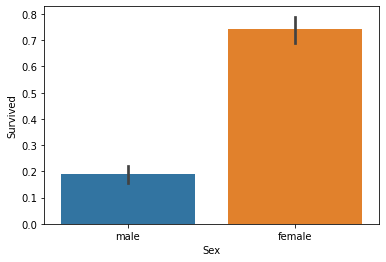

In [46]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

부자와 가난한 사람 간의 생존 확률을 살펴보자

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

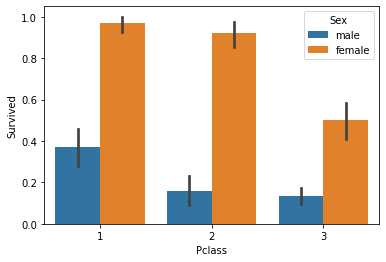

In [47]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

여성의 경우 일, 이등실에 따른 생존 확률 차이가 크지 않지만 삼등실의 생존 확률이 상대적으로 떨어짐을 알 수 있다.  
남성의 경우 일, 이등실의 생존확률이 월등히 높다.  
다음은 Age에 따른 생존확률을 알아보자

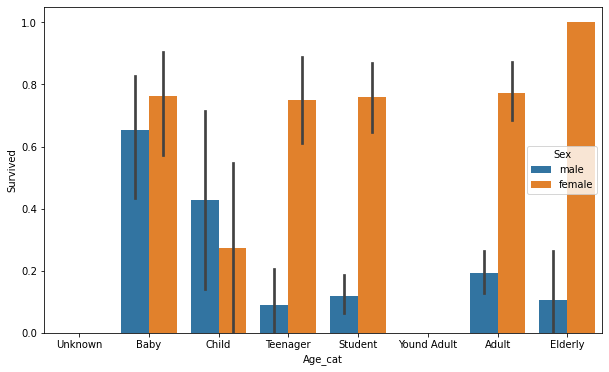

In [48]:
#Age는 값 종류가 많기 때문에 범위별로 분류해 카테고리 값을 할당하자
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <=12: cat = 'Child'
    elif age <=18: cat = 'Teenager'
    elif age <=25: cat = 'Student'
    elif age <=35: cat = 'Young Adult'
    elif age <=60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

plt.figure(figsize=(10,6))

group_names = ['Unknown','Baby','Child','Teenager','Student','Yound Adult','Adult','Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue ='Sex', data=titanic_df,order=group_names)
titanic_df.drop('Age_cat', axis=1,inplace=True)

남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환한다.

In [49]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


지금까지 피처를 가공한 내역을 정리하고 함수로 만들어 쉽게 재사용할 수 있도록 만든다.  
전처리를 전체적으로 호출하는 함수는 transform_features()이며 Null 처리, 불필요한 피처 제거, 인코딩을 수행하는 내부 함수로 구성한다.
불필요한 피처 제거는 drop_features(df)로 수행한다.

In [50]:
#Null 처리
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

#머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name','Ticket'],axis=1,inplace=True)
    return df

#레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features=['Cabin','Sex','Embarked']
    
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df

원본 CSV파일을 다시 로딩해 가공해보자, survived 속성만 별도 분리해 클래스 결정값 데이터 세트로 만든다.
survived 속성을 드롭해 피처 데이터 세트를 만든다.

In [51]:
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

별도의 테스트 데이터 세트를 추출한다.

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,test_size=0.2,random_state=11)

ML알고리즘인 결정트리, 랜덤포레스트, 로지스틱 회귀를 이용해 생존자 예측을 해보자

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

#DecisionTree 학습
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test,dt_pred)))

#RandomForest 학습
rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test,rf_pred)))

#LogisticRegression 학습
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도:{0:.4f}'.format(accuracy_score(y_test,lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도:0.8659


교차 검증으로 결정 트리 모델을 좀 더 평가해 보겠습니다.

In [54]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test,predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count,accuracy))
    
    mean_score = np.mean(scores)
    print('평균 정확도:{0:.4f}'.format(mean_score))

    
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도:0.7823


cross_val_score() API를 이용해 수행

In [55]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)

for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.743017
교차 검증 1 정확도: 0.775281
교차 검증 2 정확도: 0.792135
교차 검증 3 정확도: 0.786517
교차 검증 4 정확도: 0.842697
평균 정확도: 0.7879


In [56]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy',cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)

accuracy = accuracy_score(y_test,dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


정리